# Actividad Optimización DL-ML

## Código 1

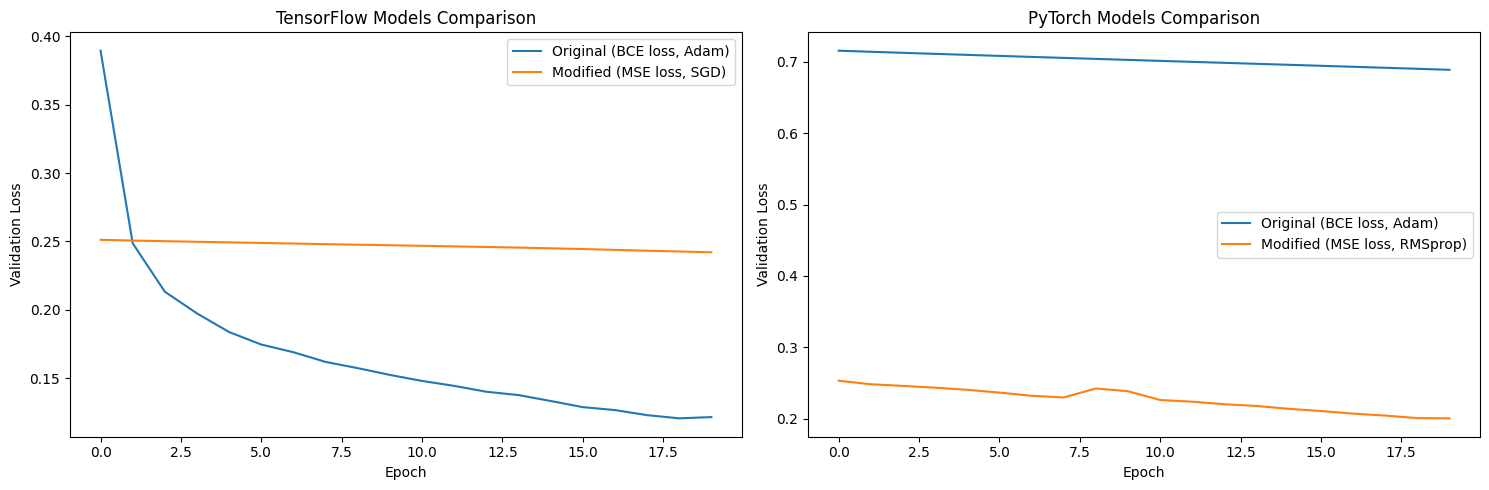


Final Validation Losses:
TensorFlow:
Original model: 0.1216
Modified model: 0.2421

PyTorch:
Original model: 0.6890
Modified model: 0.2003


In [6]:
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create two different datasets
# Original dataset
X1, y1 = make_classification(
    n_samples=10000,
    n_informative=10,
    random_state=2022
)

# Different dataset (circular pattern)
X2, y2 = make_circles(n_samples=10000, noise=0.1, random_state=2022)

# Split original dataset
X1_new, X1_test = X1[:9000, :], X1[9000:, :]
y1_new, y1_test = y1[:9000], y[9000:]

X1_train, X1_val, y1_train, y1_val = train_test_split(
    X1_new, y1_new,
    test_size=0.3
)

# Split different dataset
X2_new, X2_test = X2[:9000, :], X2[9000:, :]
y2_new, y2_test = y2[:9000], y2[9000:]

X2_train, X2_val, y2_train, y2_val = train_test_split(
    X2_new, y2_new,
    test_size=0.3
)

# TensorFlow Models
# Original model
model_tf_original = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(X1_train.shape[1],), activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Modified model - deeper architecture, different optimizer, learning rate
model_tf_modified = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=(X2_train.shape[1],), activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile and train original TF model
model_tf_original.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history_tf_original = model_tf_original.fit(
    X1_train, y1_train,
    epochs=20,
    validation_data=(X1_val, y1_val),
    verbose=0
)

# Compile and train modified TF model
model_tf_modified.compile(
    loss="mean_squared_error",  # Different loss function
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Different optimizer and learning rate
    metrics=["accuracy"]
)

history_tf_modified = model_tf_modified.fit(
    X2_train, y2_train,
    epochs=20,
    validation_data=(X2_val, y2_val),
    verbose=0
)

# PyTorch Models
# Convert data to tensors for PyTorch
X1_train_tensor = torch.tensor(X1_train, dtype=torch.float32)
X1_val_tensor = torch.tensor(X1_val, dtype=torch.float32)
y1_train_tensor = torch.tensor(y1_train, dtype=torch.float32).reshape(-1, 1)
y1_val_tensor = torch.tensor(y1_val, dtype=torch.float32).reshape(-1, 1)

X2_train_tensor = torch.tensor(X2_train, dtype=torch.float32)
X2_val_tensor = torch.tensor(X2_val, dtype=torch.float32)
y2_train_tensor = torch.tensor(y2_train, dtype=torch.float32).reshape(-1, 1)
y2_val_tensor = torch.tensor(y2_val, dtype=torch.float32).reshape(-1, 1)

# Original PyTorch model
class OriginalPyTorchModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(X1_train.shape[1], 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

# Modified PyTorch model
class ModifiedPyTorchModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(X2_train.shape[1], 20),
            nn.ReLU(),
            nn.Dropout(0.2),  # Added dropout
            nn.Linear(20, 15),
            nn.ReLU(),
            nn.Linear(15, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

# Initialize PyTorch models
model_pt_original = OriginalPyTorchModel()
model_pt_modified = ModifiedPyTorchModel()

# Training function for PyTorch models
def train_pytorch_model(model, X_train, y_train, X_val, y_val, optimizer, loss_fn, epochs=20):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Validation
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = loss_fn(y_val_pred, y_val)
            val_losses.append(val_loss.item())

    return train_losses, val_losses

# Train original PyTorch model
optimizer_original = optim.Adam(model_pt_original.parameters(), lr=0.001)
loss_fn_original = nn.BCELoss()
train_losses_pt_original, val_losses_pt_original = train_pytorch_model(
    model_pt_original,
    X1_train_tensor,
    y1_train_tensor,
    X1_val_tensor,
    y1_val_tensor,
    optimizer_original,
    loss_fn_original
)

# Train modified PyTorch model
optimizer_modified = optim.RMSprop(model_pt_modified.parameters(), lr=0.005)  # Different optimizer and learning rate
loss_fn_modified = nn.MSELoss()  # Different loss function
train_losses_pt_modified, val_losses_pt_modified = train_pytorch_model(
    model_pt_modified,
    X2_train_tensor,
    y2_train_tensor,
    X2_val_tensor,
    y2_val_tensor,
    optimizer_modified,
    loss_fn_modified
)

# Plotting results
plt.figure(figsize=(15, 5))

# TensorFlow models comparison
plt.subplot(1, 2, 1)
plt.plot(history_tf_original.history['val_loss'], label='Original (BCE loss, Adam)')
plt.plot(history_tf_modified.history['val_loss'], label='Modified (MSE loss, SGD)')
plt.title('TensorFlow Models Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()

# PyTorch models comparison
plt.subplot(1, 2, 2)
plt.plot(val_losses_pt_original, label='Original (BCE loss, Adam)')
plt.plot(val_losses_pt_modified, label='Modified (MSE loss, RMSprop)')
plt.title('PyTorch Models Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print final validation losses
print("\nFinal Validation Losses:")
print("TensorFlow:")
print(f"Original model: {history_tf_original.history['val_loss'][-1]:.4f}")
print(f"Modified model: {history_tf_modified.history['val_loss'][-1]:.4f}")
print("\nPyTorch:")
print(f"Original model: {val_losses_pt_original[-1]:.4f}")
print(f"Modified model: {val_losses_pt_modified[-1]:.4f}")

La comparación entre los modelos en TensorFlow y PyTorch revela cómo los parámetros de arquitectura, optimizador, función de pérdida, y tasa de aprendizaje afectan el rendimiento.

En TensorFlow, el modelo original tiene una arquitectura simple con dos capas densas de 10 neuronas y activación ReLU, seguido de una capa de salida con sigmoide para clasificación binaria. Usa la función de pérdida de Entropía Cruzada Binaria (BCE) y el optimizador Adam con una tasa de aprendizaje estándar. Esto le permite adaptarse rápidamente a los datos de clasificación, alcanzando una pérdida final de validación de 0.1216. Por otro lado, el modelo modificado utiliza una arquitectura más profunda, con tres capas densas de 20, 15 y 15 neuronas respectivamente, y también activaciones ReLU. La pérdida utilizada es Error Cuadrático Medio (MSE), combinada con el optimizador SGD a una tasa de aprendizaje más baja (0.01). Esta combinación resulta menos efectiva para clasificación, dando una mayor pérdida de validación de 0.2421, lo que sugiere que MSE y SGD pueden no ser ideales en este contexto de clasificación binaria.

En PyTorch, el modelo original tiene una estructura similar a la de TensorFlow, con dos capas de 10 neuronas cada una, y usa BCE como función de pérdida y Adam como optimizador con tasa de aprendizaje de 0.001. La arquitectura del modelo modificado es un poco más compleja, con capas de 20 y 15 neuronas, además de una capa de Dropout para regularización. En este caso, se utiliza MSE como función de pérdida y RMSprop como optimizador, con una tasa de aprendizaje de 0.005. Esta configuración logra una mejor convergencia en el conjunto de datos de patrones circulares, con una pérdida final de validación más baja de 0.2003 en comparación con el modelo original. Aquí, RMSprop parece manejar mejor los patrones circulares, mientras que MSE es más efectiva en este contexto específico que en TensorFlow.

En conclusión, los resultados muestran que BCE con Adam es más adecuada para la clasificación binaria en el conjunto de datos lineal de TensorFlow, mientras que en PyTorch, RMSprop parece adaptarse mejor a los datos con patrones complejos. Esta diferencia de rendimiento entre optimizadores y funciones de pérdida destaca la importancia de elegir los parámetros en función del tipo de datos y la arquitectura del modelo.

## Código 2

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 37s 906ms/step - accuracy: 0.3642 - loss: 1.8195 - val_accuracy: 0.8435 - val_loss: 0.5251
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 31s 799ms/step - accuracy: 0.8712 - loss: 0.4379 - val_accuracy: 0.9200 - val_loss: 0.2735
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 806ms/step - accuracy: 0.9294 - loss: 0.2427 - val_accuracy: 0.9482 - val_loss: 0.1796
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 40s 783ms/step - accuracy: 0.9513 - loss: 0.1675 - val_accuracy: 0.9579 - val_loss: 0.1413
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 31s 805ms/step - accuracy: 0.9631 - loss: 0.1225 - val_accuracy: 0.9673 - val_loss: 0.1126
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 32s 813ms/step - accuracy: 0.9716 - loss: 0.0970 - val_accuracy: 0.9704 - val_loss: 0.1028
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 47s 972ms/step - accuracy: 0.9737 - loss: 0.0896 - val_accuracy: 0.9712 - val_loss: 0.0966
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 34s 799ms/step - accuracy: 0.9766 - loss: 0.0773 - val_accu

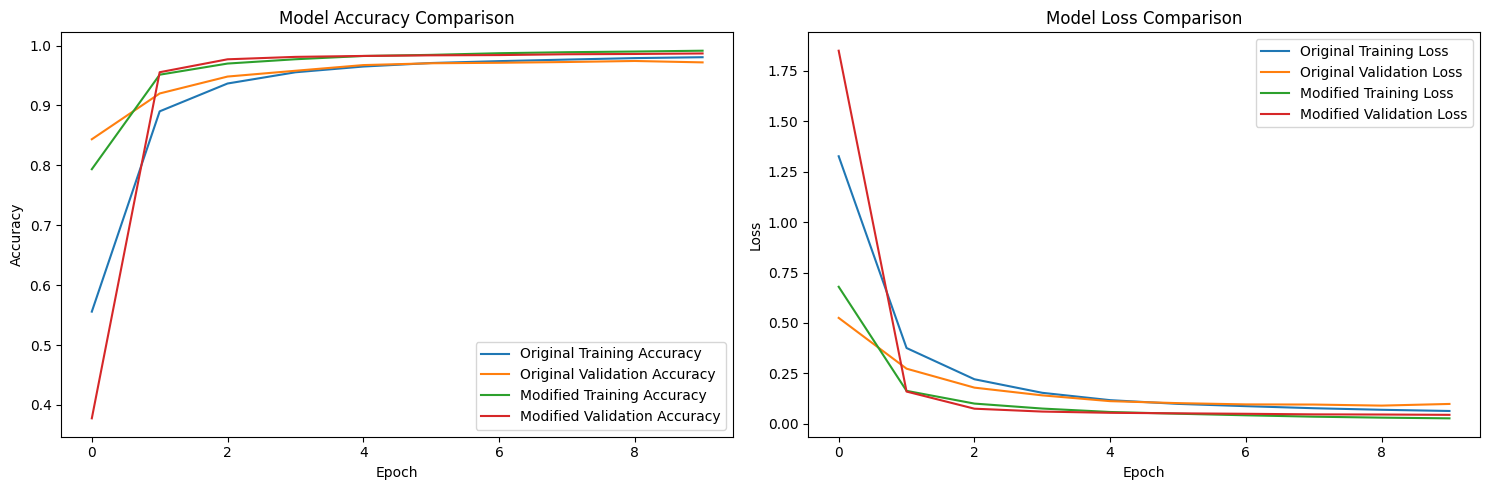

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


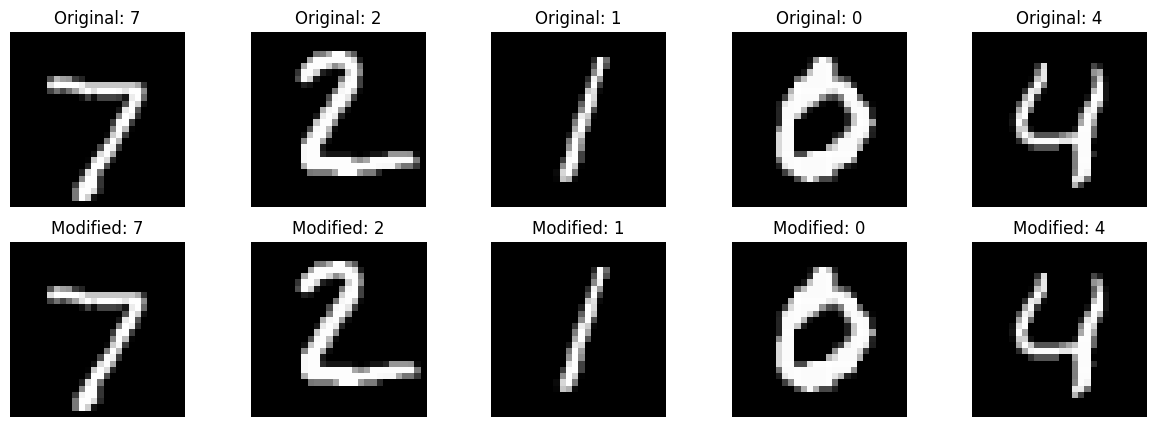

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, layers
import cv2

# Load and preprocess data
mnist_data = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

# Reshape and normalize data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Convert labels to categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Normalize pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Original Model
model_original = Sequential([
    layers.Conv2D(10, (3,3), (1,1), padding='valid', activation='relu', name="conv_layer1",
                 input_shape=(28,28,1)),
    layers.Conv2D(10, (3,3), (1,1), padding='valid', activation='relu', name="conv_layer2"),
    layers.Conv2D(10, (3,3), (1,1), padding='valid', activation='relu', name="conv_layer3"),
    layers.Flatten(),
    layers.Dense(32, activation='relu', name="ANN_layer1"),
    layers.Dense(16, activation='relu', name="ANN_layer2"),
    layers.Dense(10, activation='softmax', name="Output")
])

# Modified Model with different architecture and parameters
model_modified = Sequential([
    # Increased number of filters and added MaxPooling
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dropout(0.3),  # Added dropout for regularization
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile models
model_original.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model_modified.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate
    metrics=["accuracy"]
)

# Train both models
history_original = model_original.fit(
    x_train,
    y_train,
    batch_size=1000,
    epochs=10,
    validation_split=0.35,
    verbose=1
)

history_modified = model_modified.fit(
    x_train,
    y_train,
    batch_size=128,  # Smaller batch size
    epochs=10,
    validation_split=0.35,
    verbose=1
)

# Evaluate both models
print("\nOriginal Model Evaluation:")
original_eval = model_original.evaluate(x_test, y_test)
print("\nModified Model Evaluation:")
modified_eval = model_modified.evaluate(x_test, y_test)

# Plot training history comparison
plt.figure(figsize=(15, 5))

# Plot accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(history_original.history['accuracy'], label='Original Training Accuracy')
plt.plot(history_original.history['val_accuracy'], label='Original Validation Accuracy')
plt.plot(history_modified.history['accuracy'], label='Modified Training Accuracy')
plt.plot(history_modified.history['val_accuracy'], label='Modified Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss comparison
plt.subplot(1, 2, 2)
plt.plot(history_original.history['loss'], label='Original Training Loss')
plt.plot(history_original.history['val_loss'], label='Original Validation Loss')
plt.plot(history_modified.history['loss'], label='Modified Training Loss')
plt.plot(history_modified.history['val_loss'], label='Modified Validation Loss')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Compare predictions on a few test images
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    pred_original = np.argmax(model_original.predict(x_test[i:i+1]))
    plt.title(f'Original: {pred_original}')
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    pred_modified = np.argmax(model_modified.predict(x_test[i:i+1]))
    plt.title(f'Modified: {pred_modified}')
    plt.axis('off')

plt.show()

La comparación entre los modelos original y modificado destaca diferencias clave en su arquitectura y configuración de parámetros que impactan en la pérdida de entropía. El modelo original utiliza una arquitectura simple con tres capas convolucionales de 10 filtros, sin pooling ni dropout, mientras que el modelo modificado adopta una estructura más profunda con filtros adicionales, Batch Normalization, MaxPooling y dropout, lo que mejora la extracción de características y reduce el sobreajuste. Estas diferencias permiten al modelo modificado capturar patrones más complejos de los datos.

En cuanto al optimizador y los parámetros de entrenamiento, ambos modelos utilizan Adam, pero el modelo modificado emplea una tasa de aprendizaje más baja (0.0001), lo que favorece un entrenamiento más gradual y estable, reduciendo el riesgo de converger a mínimos locales de manera prematura. Además, el modelo original utiliza un tamaño de batch grande (1000), acelerando el entrenamiento pero limitando la generalización, mientras que el modelo modificado opta por un batch más pequeño (128) y regula el sobreajuste mediante dropout (0.3), mejorando su capacidad para adaptarse a datos no vistos.

Los gráficos de desempeño reflejan estas diferencias: el modelo original muestra una rápida estabilización de la precisión y la pérdida, pero con limitaciones en su generalización. En cambio, el modelo modificado logra mejoras consistentes en precisión y una menor pérdida de validación, indicando una mejor capacidad para minimizar la entropía y generalizar en datos de prueba. Esto confirma que la arquitectura más robusta y los ajustes precisos en el modelo modificado optimizan su rendimiento frente a problemas más complejos.